In [1]:
import numpy as np
import pandas as pd 
import os

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import matplotlib.cm as cm


In [2]:
df=pd.read_csv('/Users/ypi/Desktop/电子产品销售分析.csv')

In [3]:
df.head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
1,1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
2,2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
3,3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
4,4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564169 entries, 0 to 564168
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     564169 non-null  int64  
 1   event_time     564169 non-null  object 
 2   order_id       564169 non-null  int64  
 3   product_id     564169 non-null  int64  
 4   category_id    564169 non-null  float64
 5   category_code  434799 non-null  object 
 6   brand          536945 non-null  object 
 7   price          564169 non-null  float64
 8   user_id        564169 non-null  float64
 9   age            564169 non-null  float64
 10  sex            564169 non-null  object 
 11  local          564169 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 51.7+ MB


In [5]:
## date 



df=pd.concat([df, df['event_time'].str.split('-', expand=True)], axis=1)

### df[].str.split('-',expand=True) 




In [6]:
df.columns= [   'Unnamed: 0',    'event_time',      'order_id',    'product_id',
         'category_id', 'category_code',         'brand',         'price',
             'user_id',           'age',           'sex',         'local',
            'year',               'month',               'day']

df['year']=df['year'].str.replace('1970','2020')
df.year.value_counts()

2020    564169
Name: year, dtype: int64

In [7]:
for col in df:
    df[col] = df[col].apply(lambda x: np.NaN if x=='NaN' else x)

In [8]:
df.iloc[4].category_code

nan

In [9]:
df.isnull().sum()

Unnamed: 0            0
event_time            0
order_id              0
product_id            0
category_id           0
category_code    129370
brand             27224
price                 0
user_id               0
age                   0
sex                   0
local                 0
year                  0
month                 0
day                   0
dtype: int64

In [10]:
df.local.value_counts()

广东    122909
上海     95356
北京     92688
湖南     35181
海南     34482
四川     33849
重庆     32131
浙江     30945
江苏     30216
天津     29560
湖北     26852
Name: local, dtype: int64

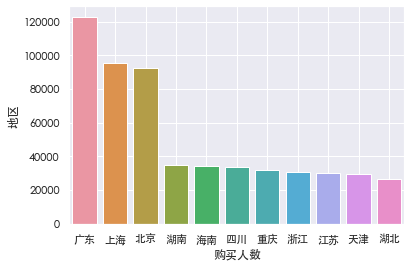

In [11]:

import seaborn as sns 
from matplotlib.font_manager import FontProperties

myfont=FontProperties(fname=r'/System/Library/Fonts/STHeiti Light.ttc')
sns.set(font=myfont.get_name())


sns.barplot(x=df.local.value_counts().index,y=df.local.value_counts())
plt.xlabel('购买人数')
plt.ylabel('地区')
plt.grid(True)

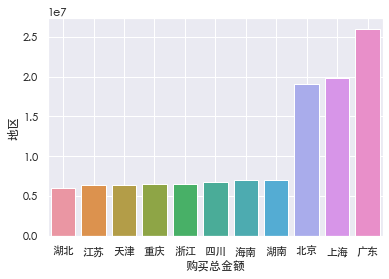

In [12]:
reg_spend=df.groupby('local')['price'].sum().reset_index(name='total spend')
sns.barplot(x='local',y='total spend',data=reg_spend,order=reg_spend.sort_values('total spend').local)

plt.xlabel('购买总金额')
plt.ylabel('地区')
plt.grid(True)

In [13]:
age=df.groupby('local')['age'].mean()
age

local
上海    32.890033
北京    33.007002
四川    33.126414
天津    34.379770
广东    33.044545
江苏    33.100377
浙江    32.770658
海南    32.652282
湖北    34.257634
湖南    33.883915
重庆    33.451589
Name: age, dtype: float64

In [14]:
bin=[16,25,30,35,40,50]


df.age=pd.cut(df.age,bin,labels=['16-25','25-30','30-35','35-40','40-50'])


In [15]:
df.head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,year,month,day
0,0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,16-25,女,海南,2020,04,24 11:50:39 UTC
1,1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,16-25,女,海南,2020,04,24 11:50:39 UTC
2,2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,35-40,女,北京,2020,04,24 14:37:43 UTC
3,3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,35-40,女,北京,2020,04,24 14:37:43 UTC
4,4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,30-35,女,广东,2020,04,24 19:16:21 UTC


In [16]:
age_value=df.groupby('local')['age'].value_counts().reset_index(name='count')


<AxesSubplot:xlabel='local', ylabel='count'>

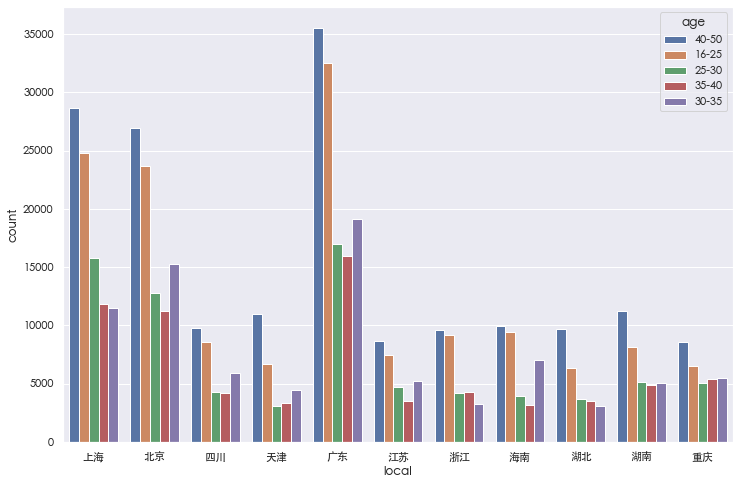

In [17]:
import seaborn as sns 
from matplotlib.font_manager import FontProperties

myfont=FontProperties(fname=r'/System/Library/Fonts/STHeiti Light.ttc')
sns.set(font=myfont.get_name())


rcParams["figure.figsize"]=12,8
sns.barplot(x='local',y='count',data=age_value,hue='age')


<AxesSubplot:xlabel='local', ylabel='count'>

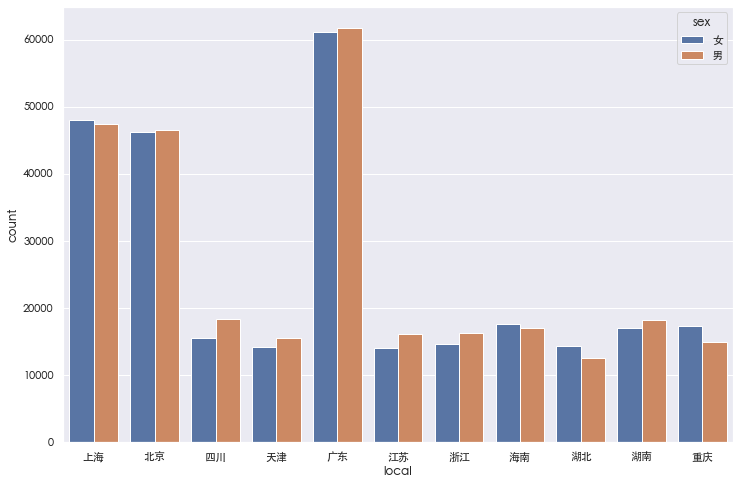

In [18]:
sex_value=df.groupby('local')['sex'].value_counts().reset_index(name='count')
sns.barplot(x='local',y='count',data=sex_value,hue='sex')

<AxesSubplot:xlabel='local', ylabel='total spend'>

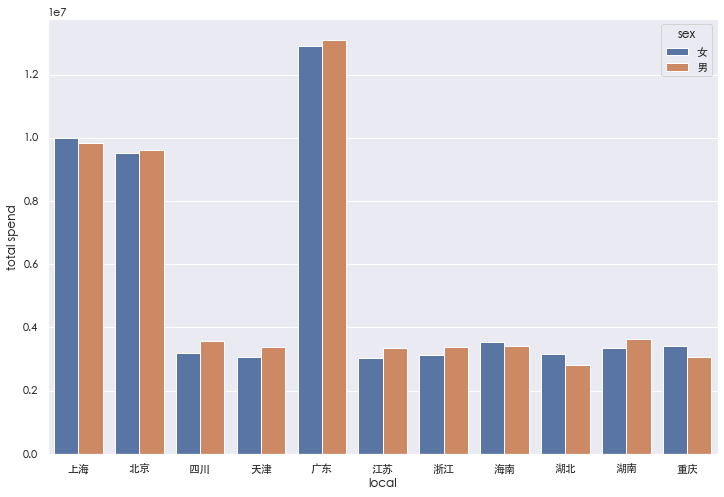

In [19]:
sex_spend=df.groupby(['local','sex'])['price'].sum().reset_index(name='total spend')
sex_spend
sns.barplot(x='local',y='total spend',data=sex_spend,hue='sex')

In [20]:
age_spend=df.groupby('age').price.sum ().reset_index(name='total spend')
age_spend

,age,total spend
0,16-25,3.010550e+07
1,25-30,1.685683e+07
2,30-35,1.742156e+07
3,35-40,1.531872e+07
4,40-50,3.475350e+07


<AxesSubplot:xlabel='age', ylabel='total spend'>

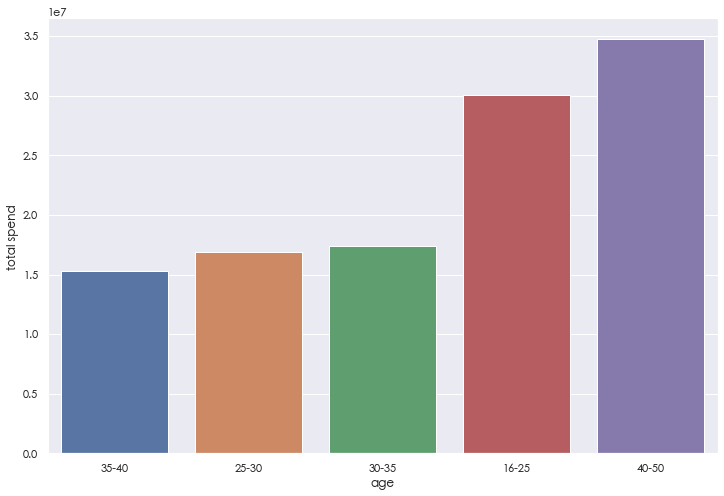

In [21]:
import seaborn as sns 
from matplotlib.font_manager import FontProperties

myfont=FontProperties(fname=r'/System/Library/Fonts/STHeiti Light.ttc')
sns.set(font=myfont.get_name())


rcParams["figure.figsize"]=12,8
sns.barplot(x='age',y='total spend',data=age_spend,order=age_spend.sort_values('total spend').age)

In [22]:
df[(df.category_code.isna())&(df.brand.isna())]

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,year,month,day
18,18,2020-04-28 04:25:00 UTC,2297034737199350540,1515966223509719628,2.268106e+18,NaN,NaN,6.94,1.515916e+18,35-40,女,北京,2020,04,28 04:25:00 UTC
19,19,2020-04-28 04:25:00 UTC,2297034737199350540,1515966223509719628,2.268106e+18,NaN,NaN,6.94,1.515916e+18,35-40,女,北京,2020,04,28 04:25:00 UTC
64,64,2020-04-29 12:42:12 UTC,2298009757589438761,1515966223509104402,2.268105e+18,NaN,NaN,300.90,1.515916e+18,40-50,女,广东,2020,04,29 12:42:12 UTC
82,82,2020-04-29 13:17:16 UTC,2298027408663511168,1515966223510206441,2.268105e+18,NaN,NaN,2.52,1.515916e+18,30-35,女,上海,2020,04,29 13:17:16 UTC
206,206,2020-04-29 17:12:37 UTC,2298145860900356978,1515966223509267375,2.268105e+18,NaN,NaN,1.16,1.515916e+18,40-50,女,海南,2020,04,29 17:12:37 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563884,2633236,2020-11-21 02:59:47 UTC,2388440981134693699,1515966223532407394,2.268105e+18,NaN,NaN,645.81,1.515916e+18,40-50,女,湖南,2020,11,21 02:59:47 UTC
563918,2633270,2020-11-21 04:50:30 UTC,2388440981134693728,1515966223509296887,2.268105e+18,NaN,NaN,48.59,1.515916e+18,16-25,男,广东,2020,11,21 04:50:30 UTC
563964,2633316,2020-11-21 06:01:36 UTC,2388440981134693769,1515966223532411322,2.268105e+18,NaN,NaN,400.44,1.515916e+18,16-25,男,海南,2020,11,21 06:01:36 UTC
564009,2633361,2020-11-21 06:48:38 UTC,2388440981134693809,1515966223509266682,2.268105e+18,NaN,NaN,49.75,1.515916e+18,16-25,男,北京,2020,11,21 06:48:38 UTC


In [23]:
df[df.category_code.isna()]

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,year,month,day
4,4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,30-35,女,广东,2020,04,24 19:16:21 UTC
16,16,2020-04-28 02:21:45 UTC,2296972701060825130,1515966223509104683,2.268105e+18,NaN,philips,23.13,1.515916e+18,16-25,男,广东,2020,04,28 02:21:45 UTC
18,18,2020-04-28 04:25:00 UTC,2297034737199350540,1515966223509719628,2.268106e+18,NaN,NaN,6.94,1.515916e+18,35-40,女,北京,2020,04,28 04:25:00 UTC
19,19,2020-04-28 04:25:00 UTC,2297034737199350540,1515966223509719628,2.268106e+18,NaN,NaN,6.94,1.515916e+18,35-40,女,北京,2020,04,28 04:25:00 UTC
25,25,2020-04-29 03:25:12 UTC,2297729407910937541,1515966223509105105,2.268105e+18,NaN,sbs,0.02,1.515916e+18,40-50,男,广东,2020,04,29 03:25:12 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564144,2633496,2020-11-21 09:50:24 UTC,2388440981134693925,1515966223513916332,2.268105e+18,NaN,ava,78.68,1.515916e+18,40-50,男,北京,2020,11,21 09:50:24 UTC
564150,2633502,2020-11-21 09:59:01 UTC,2388440981134693930,1515966223510177554,2.268105e+18,NaN,dji,0.23,1.515916e+18,30-35,女,上海,2020,11,21 09:59:01 UTC
564151,2633503,2020-11-21 09:59:01 UTC,2388440981134693930,2273948237628965713,2.268105e+18,NaN,dji,0.23,1.515916e+18,30-35,女,上海,2020,11,21 09:59:01 UTC
564161,2633513,2020-11-21 10:08:14 UTC,2388440981134693940,2273948246856434093,2.268105e+18,NaN,xiaomi,16.18,1.515916e+18,35-40,女,广东,2020,11,21 10:08:14 UTC


In [24]:
df[df.isna().any(axis=1)]

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,year,month,day
4,4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,30-35,女,广东,2020,04,24 19:16:21 UTC
12,12,2020-04-27 07:24:51 UTC,2296400480990920715,2273948308663698152,2.374499e+18,electronics.video.tv,samsung,416.64,1.515916e+18,NaN,女,北京,2020,04,27 07:24:51 UTC
16,16,2020-04-28 02:21:45 UTC,2296972701060825130,1515966223509104683,2.268105e+18,NaN,philips,23.13,1.515916e+18,16-25,男,广东,2020,04,28 02:21:45 UTC
18,18,2020-04-28 04:25:00 UTC,2297034737199350540,1515966223509719628,2.268106e+18,NaN,NaN,6.94,1.515916e+18,35-40,女,北京,2020,04,28 04:25:00 UTC
19,19,2020-04-28 04:25:00 UTC,2297034737199350540,1515966223509719628,2.268106e+18,NaN,NaN,6.94,1.515916e+18,35-40,女,北京,2020,04,28 04:25:00 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564144,2633496,2020-11-21 09:50:24 UTC,2388440981134693925,1515966223513916332,2.268105e+18,NaN,ava,78.68,1.515916e+18,40-50,男,北京,2020,11,21 09:50:24 UTC
564150,2633502,2020-11-21 09:59:01 UTC,2388440981134693930,1515966223510177554,2.268105e+18,NaN,dji,0.23,1.515916e+18,30-35,女,上海,2020,11,21 09:59:01 UTC
564151,2633503,2020-11-21 09:59:01 UTC,2388440981134693930,2273948237628965713,2.268105e+18,NaN,dji,0.23,1.515916e+18,30-35,女,上海,2020,11,21 09:59:01 UTC
564161,2633513,2020-11-21 10:08:14 UTC,2388440981134693940,2273948246856434093,2.268105e+18,NaN,xiaomi,16.18,1.515916e+18,35-40,女,广东,2020,11,21 10:08:14 UTC


In [25]:
brand=df.brand.value_counts().head(30)
brand

samsung      96239
apple        36084
ava          26123
tefal        17956
lg           16696
xiaomi       14881
philips      12151
polaris      10730
huawei       10722
bosch        10206
asus          9118
sony          8247
lenovo        7924
beko          7921
neo           7332
oppo          6963
hp            6453
vitek         6452
braun         5446
scarlett      5045
moulinex      4399
akvafor       4297
logitech      4184
transcend     4128
redmond       4120
rowenta       3920
tp-link       3830
panasonic     3643
rondell       3550
camelion      3361
Name: brand, dtype: int64

<AxesSubplot:xlabel='local', ylabel='total sell'>

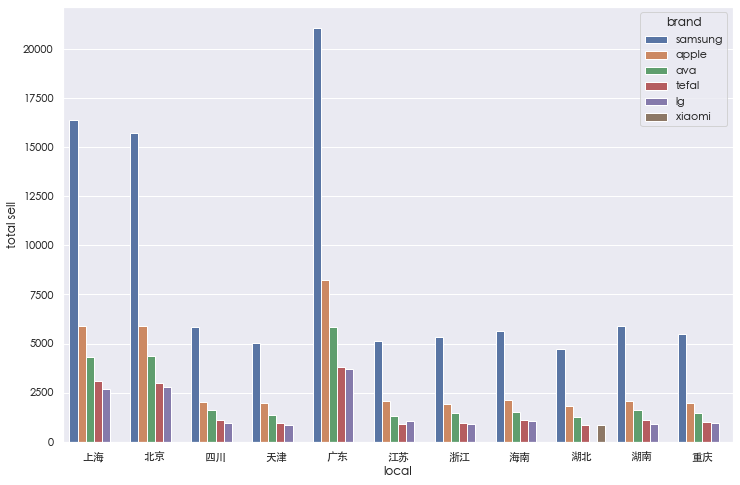

In [26]:
reg_brand=df.groupby('local').brand.value_counts().groupby(level=0, group_keys=False).head(5).reset_index(name='total sell')
sns.barplot(x='local',y='total sell',hue='brand',data=reg_brand)


## groupby(level=0,group_key=False)
## only select the first five
## groupby(level=0,group_keys=False)

In [27]:
df.brand.fillna('No brand',inplace=True)

## isna()  fillna.  isnull().sum()

<AxesSubplot:ylabel='brand'>

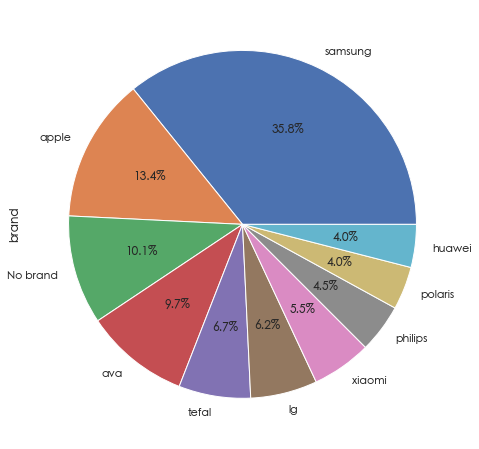

In [28]:
df.brand.value_counts().nlargest(10).plot(kind='pie',autopct='%.1f%%')

In [29]:
user_record= df.groupby('user_id')['order_id'].count().sort_values(ascending=False)
user_record

user_id
1.515916e+18    1092
1.515916e+18    1073
1.515916e+18    1040
1.515916e+18    1028
1.515916e+18    1002
                ... 
1.515916e+18       1
1.515916e+18       1
1.515916e+18       1
1.515916e+18       1
1.515916e+18       1
Name: order_id, Length: 93823, dtype: int64

In [30]:
df_b = df.loc[df['user_id'].isin(user_record[user_record<30].index)]
df_b['user_level']='B'

df_a = df.loc[df['user_id'].isin(user_record[user_record>=30].index)]
df_a['user_level']='A'

df_ab=pd.concat([df_a,df_b])


### loc --- need index 
## df[].isin().index

/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [31]:
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564169 entries, 35 to 564168
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Unnamed: 0     564169 non-null  int64   
 1   event_time     564169 non-null  object  
 2   order_id       564169 non-null  int64   
 3   product_id     564169 non-null  int64   
 4   category_id    564169 non-null  float64 
 5   category_code  434799 non-null  object  
 6   brand          564169 non-null  object  
 7   price          564169 non-null  float64 
 8   user_id        564169 non-null  float64 
 9   age            549065 non-null  category
 10  sex            564169 non-null  object  
 11  local          564169 non-null  object  
 12  year           564169 non-null  object  
 13  month          564169 non-null  object  
 14  day            564169 non-null  object  
 15  user_level     564169 non-null  object  
dtypes: category(1), float64(3), int64(3), object(9)
memory 

<AxesSubplot:ylabel='user_id'>

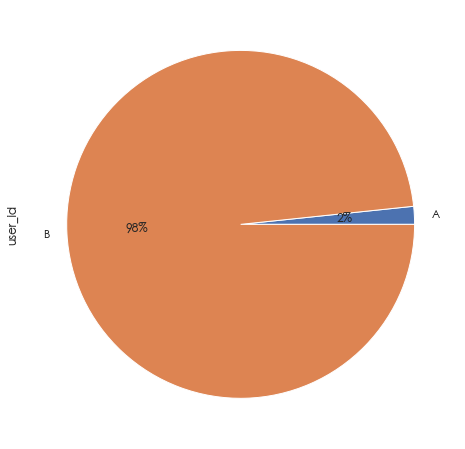

In [32]:
df_ab.groupby('user_level')['user_id'].nunique().plot(kind='pie',autopct='%.0f%%')

<AxesSubplot:xlabel='user_level'>

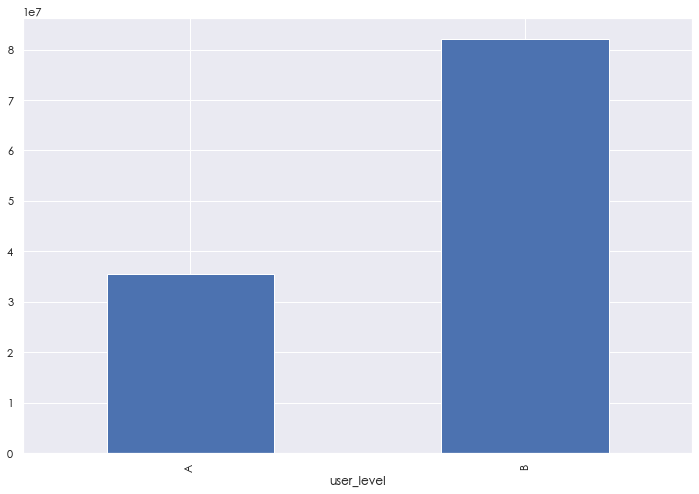

In [33]:
df_ab.groupby('user_level')['price'].sum().plot(kind='bar')

<AxesSubplot:xlabel='user_level'>

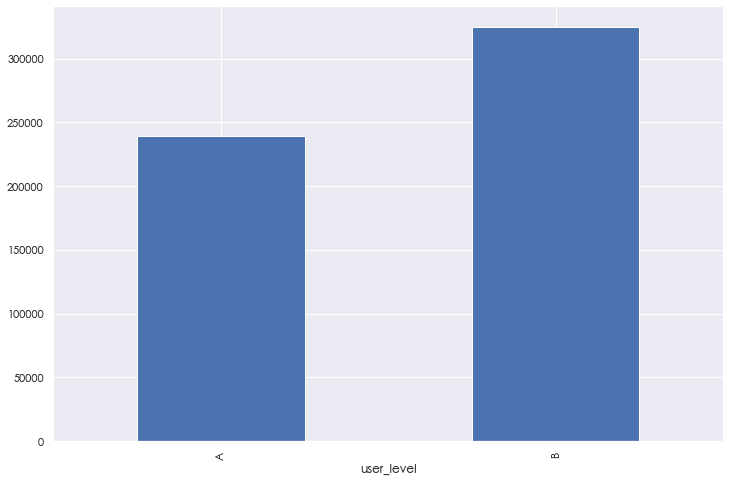

In [34]:
df_ab.groupby('user_level')['order_id'].count().plot(kind='bar')

<AxesSubplot:xlabel='brand'>

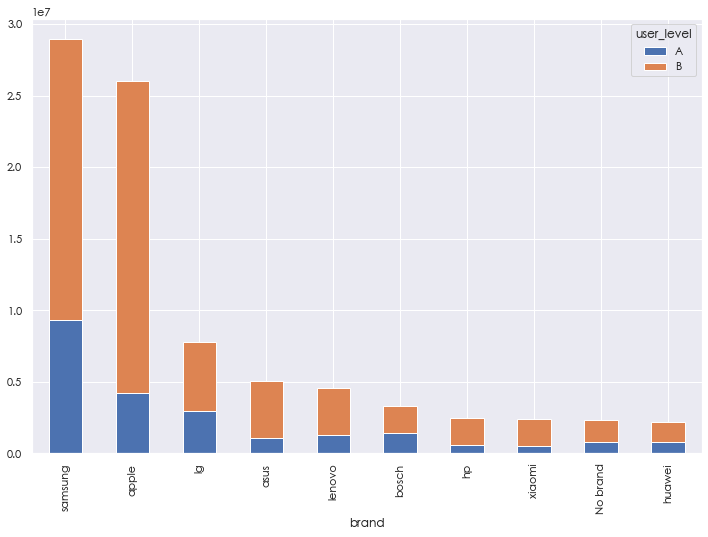

In [35]:
brand=df_ab.groupby(['brand','user_level'])['price'].sum().unstack()




brand =df_ab.groupby(['brand','user_level'])['price'].sum().unstack()
brand['total']=brand.A+brand.B
brand = brand.sort_values('total',ascending= False).head(10)
brand.iloc[:,0:2].plot(kind='bar',stacked=True)

/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'销售额-月度统计'}, xlabel='month'>

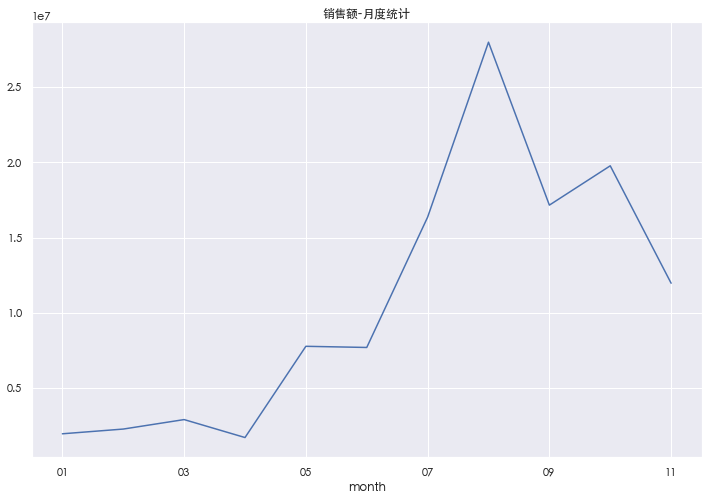

In [36]:
df_ab.groupby([df_ab['month']])['price'].sum().plot(grid=True,title='销售额-月度统计')

/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:title={'center':'订单数-月度统计'}, xlabel='month'>

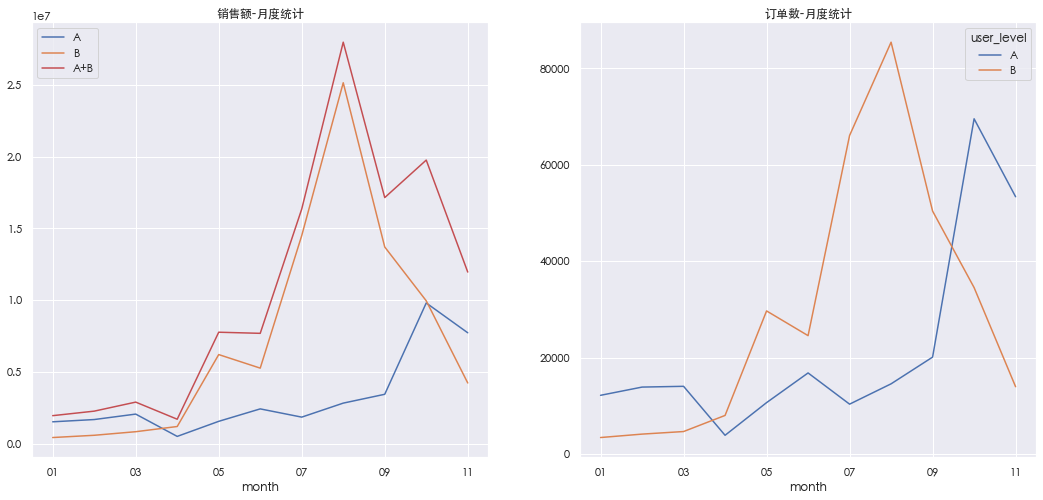

In [37]:
fig,axs = plt.subplots(1,2,figsize=(18,8))
df_ab.groupby(['month','user_level'])['price'].sum().unstack().plot(title='销售额-月度统计',ax=axs[0])
df_ab.groupby('month').price.sum().rename('A+B').plot(ax=axs[0],color='r').legend(loc=2)
df_ab.groupby(['month','user_level'])['order_id'].count().unstack().plot(grid=True,title='订单数-月度统计',ax=axs[1])


In [38]:
def active_status(x):
    status = []
    for i in range(11):
        if i == 0:
            status.append('unreg') if x[i] == 0 else status.append('new')
        else:
            if x[i] == 0:
                status.append('unreg') if status[i -1] == 'unreg' else status.append('unactive')

            else:
                if status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('return') if status[i-1] == 'unactive' else status.append('active')
    return pd.Series(status)

In [39]:
order_record = df.pivot_table(index='user_id',
                            columns='month',values='price').fillna(0)


In [40]:
user_active_status = order_record.apply(active_status,axis = 1)

In [41]:
user_active_status.columns=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"]

In [42]:
# user_active_status=user_active_status.reset_index(name='status')
# user_active_status[["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"]] = pd.DataFrame(user_active_status['status'].tolist())


/Users/ypi/PycharmProjects/pythonProject/venv/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

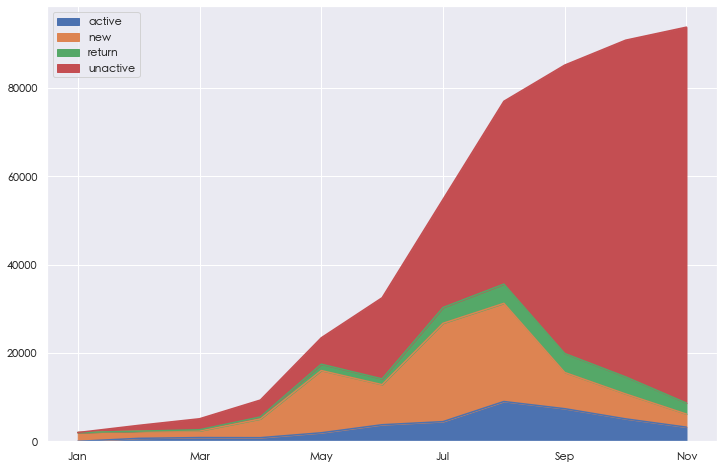

In [43]:
user_active_status.apply(pd.Series.value_counts).drop('unreg').T.plot(kind='area')


### apply(pd.series.value_counts).drop().T

In [47]:
order_record

month,01,02,03,04,05,06,07,08,09,10,11
user_id,,,,,,,,,,,
1.515916e+18,0.0,0.0,0.0,0.0,0.000000,0.00,416.640,0.0,0.00,0.000000,0.000
1.515916e+18,0.0,0.0,0.0,0.0,0.000000,0.00,0.000,0.0,21.04,35.390000,0.000
1.515916e+18,0.0,0.0,0.0,0.0,0.000000,0.00,0.000,0.0,0.00,253.242500,651.737
1.515916e+18,0.0,0.0,0.0,0.0,214.483333,324.05,630.185,0.0,414.33,60.142727,56.690
1.515916e+18,0.0,0.0,0.0,0.0,43.960000,0.00,138.870,0.0,0.00,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
1.515916e+18,0.0,0.0,0.0,0.0,0.000000,0.00,0.000,0.0,0.00,0.000000,208.310
1.515916e+18,0.0,0.0,0.0,0.0,0.000000,0.00,0.000,0.0,0.00,0.000000,3472.200
1.515916e+18,0.0,0.0,0.0,0.0,0.000000,0.00,0.000,0.0,0.00,0.000000,250.830


In [48]:

def unactive_period(x):
    largest= 0
    unactive=0
    sum=0
    for i in range(10):
        sum+=x[i]

        if sum!=0:


            if x[i]==0:
                unactive+=1
                if largest < unactive:
                    largest=unactive

                if x[i+1]!=0:
                    unactive = 0
    return largest
        

In [50]:
unactive_count= order_record.apply(unactive_period,axis=1)

In [76]:
unactive_count.value_counts(normalize=True)

2    0.301344
3    0.210108
1    0.157818
0    0.130405
5    0.094209
4    0.078467
6    0.019963
7    0.003411
8    0.002494
9    0.001780
dtype: float64

In [56]:
len(unactive_count[unactive_count!=0])/len(order_record)

0.8695948754569774

In [58]:
df.groupby('user_id').agg({'order_id':pd.Series.count,'price':np.sum})

,order_id,price
user_id,,
1.515916e+18,1,416.64
1.515916e+18,2,56.43
1.515916e+18,14,7530.34
1.515916e+18,24,5074.47
1.515916e+18,2,182.83
...,...,...
1.515916e+18,1,208.31
1.515916e+18,1,3472.20
1.515916e+18,3,752.49


In [61]:
order_total=df.groupby('user_id').agg({'order_id':pd.Series.count,'price':np.sum}).groupby('order_id').count().head(10)

In [77]:
df.groupby('user_id').agg({'order_id':pd.Series.count,'price':np.sum}).groupby('order_id').count()

,price
order_id,
1,34349
2,18412
3,10864
4,7307
5,4931
...,...
1002,1
1028,1
1040,1
